In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 15,12

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [191]:
df_train = pd.read_csv(r'C:\Users\Aditi\Downloads\Train_UWu5bXk.txt')

In [192]:
df_train.shape

(8523, 12)

In [193]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3367,FDT10,16.70,reg,0.061993,Snack Foods,60.9562,OUT013,1987,High,Tier 3,Supermarket Type1,355.5372
7741,FDK38,6.65,Low Fat,0.053280,Canned,147.7734,OUT035,2004,Small,Tier 2,Supermarket Type1,2078.6276
5163,FDA49,NaN,Low Fat,0.064607,Canned,87.4198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2267.7148
13,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
5750,FDV26,20.25,Regular,0.076471,Dairy,196.1794,OUT018,2009,Medium,Tier 3,Supermarket Type2,2731.1116


In [194]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [195]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7003,FDD58,NaN,Low Fat,0.103918,Snack Foods,100.6700,OUT019,1985,Small,Tier 1,Grocery Store,399.4800
6134,FDF40,NaN,Regular,0.022403,Dairy,250.9092,OUT027,1985,Medium,Tier 3,Supermarket Type3,8217.3036
4938,NCD43,NaN,Low Fat,0.028049,Household,106.1964,OUT019,1985,Small,Tier 1,Grocery Store,210.3928
7588,FDY48,14.00,Low Fat,0.023735,Baking Goods,103.2332,OUT046,1997,Small,Tier 1,Supermarket Type1,1845.5976
3611,NCF43,8.51,Low Fat,0.052240,Household,141.9470,OUT017,2007,NaN,Tier 2,Supermarket Type1,2004.0580


In [196]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [197]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [198]:
df_train[df_train['Item_Identifier'] == "FDP10"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


#Let us divide the variables into their respective data types

# Independent Variable

### UniqueID:

1. Item_Identifier : Unique ID for each item of data 

### Contnious Variables:

1. Item_Weight
2. Item_Visibility
3. Item_MRP

### Ordinal Variables:

1. Outlet_Establishment_Year

### Categorical Variables:

1. Item_Fat_Content 
2. Item_Type
3. Outlet_Size 
4. Outlet_Location_Type
5. Outlet_Type
6. Outlet_Identifier

# Dependent Variable

### Continuous Varibale:
1. Item_Outlet_Sales 

#### Item_Outlet_Sales

In [199]:
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

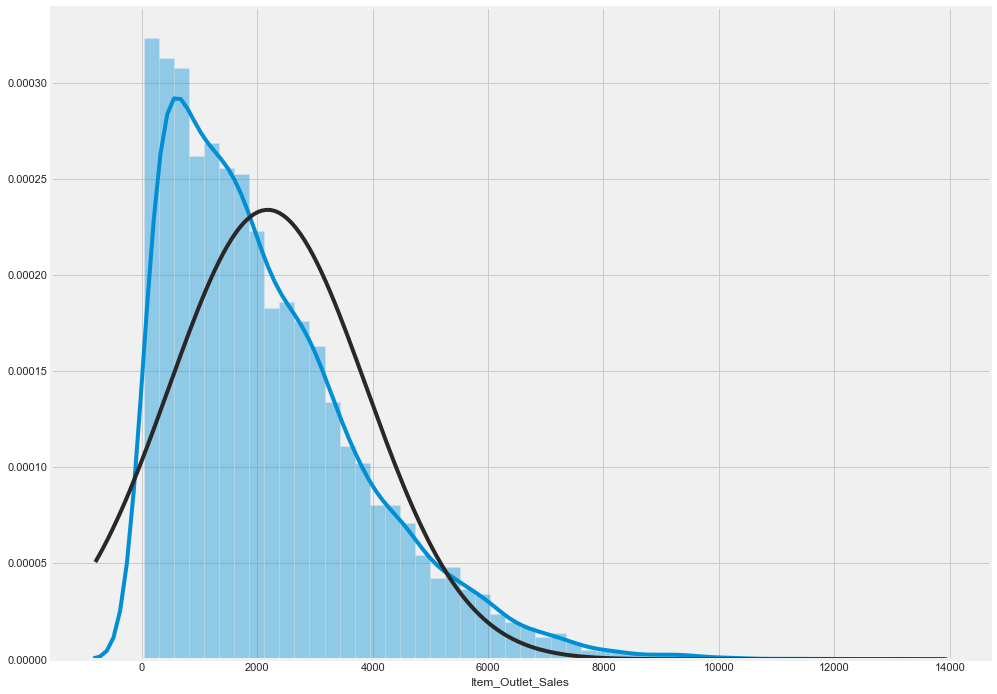

In [200]:
#histogram
from scipy.stats import norm

sns.distplot(df_train['Item_Outlet_Sales'], fit= norm)

In [201]:
print("Skewness: %f" % df_train['Item_Outlet_Sales'].skew())
print("Kurtosis: %f" % df_train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


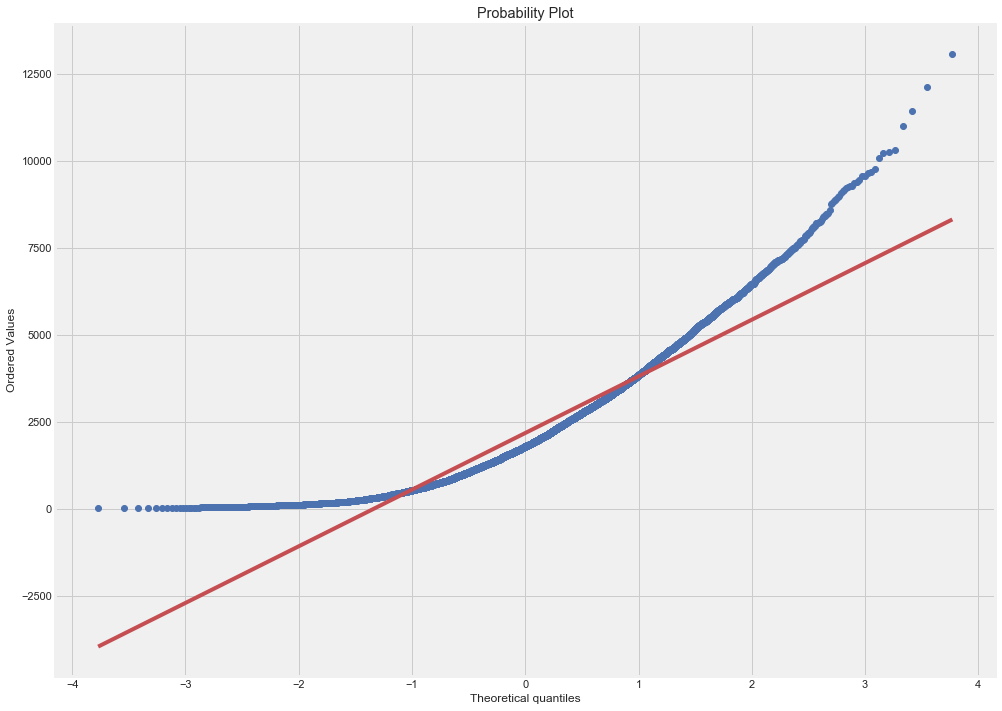

In [202]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(df_train['Item_Outlet_Sales'], plot=plt)

In [203]:
from scipy.stats import boxcox

# Log transform
data = np.sqrt(df_train['Item_Outlet_Sales'] )

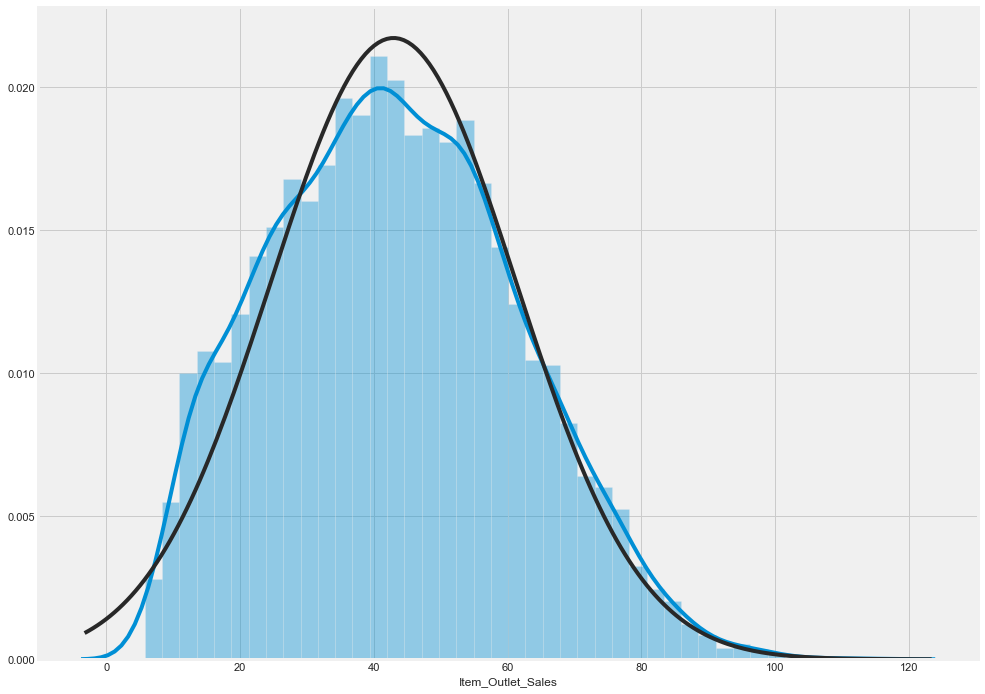

In [204]:
sns.distplot(data, fit= norm)

In [205]:
print("Skewness: %f" % pd.DataFrame(data).skew())
print("Kurtosis: %f" % pd.DataFrame(data).kurt())

Skewness: 0.234676
Kurtosis: -0.449294


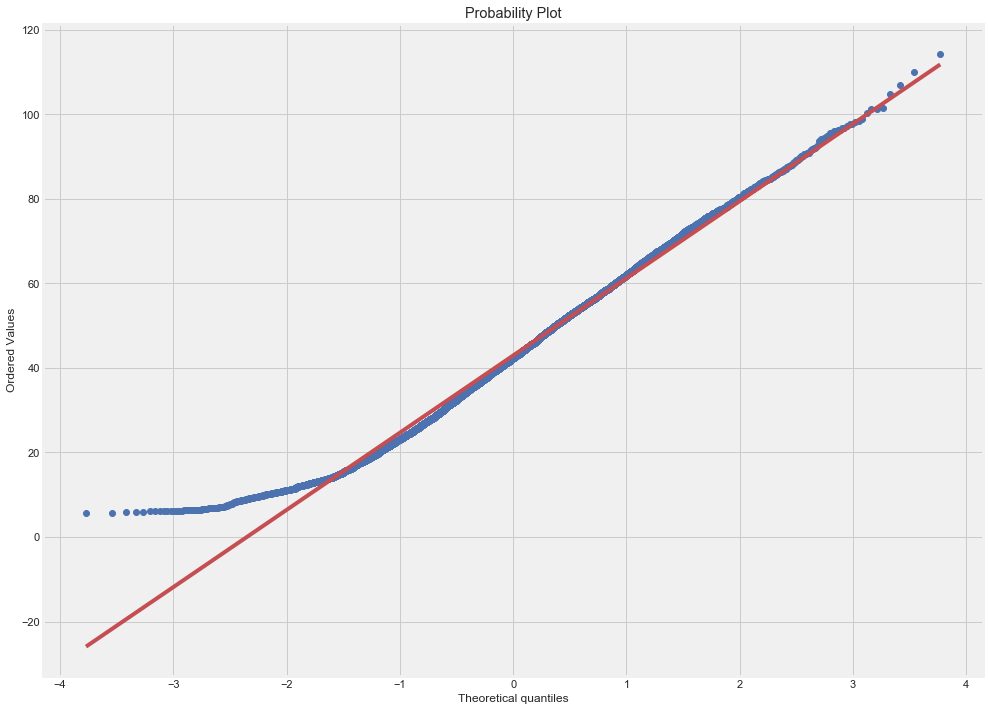

In [206]:
fig = plt.figure()
res = stats.probplot(data, plot=plt)

#### Contnious Variables Vs Target Varibale

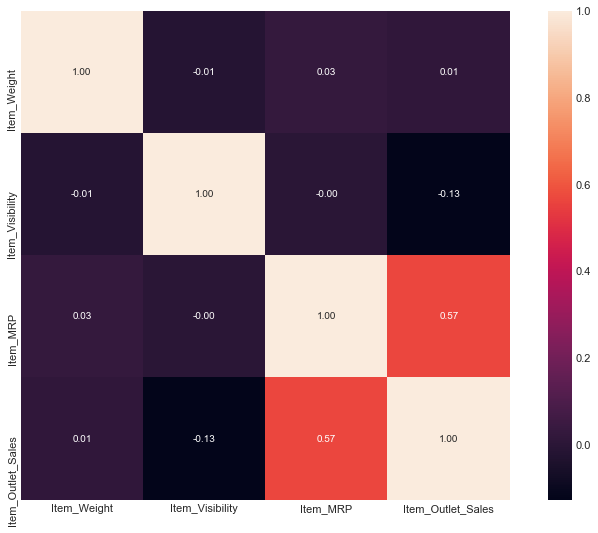

In [207]:
#correlation matrix
corrmat = df_train[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

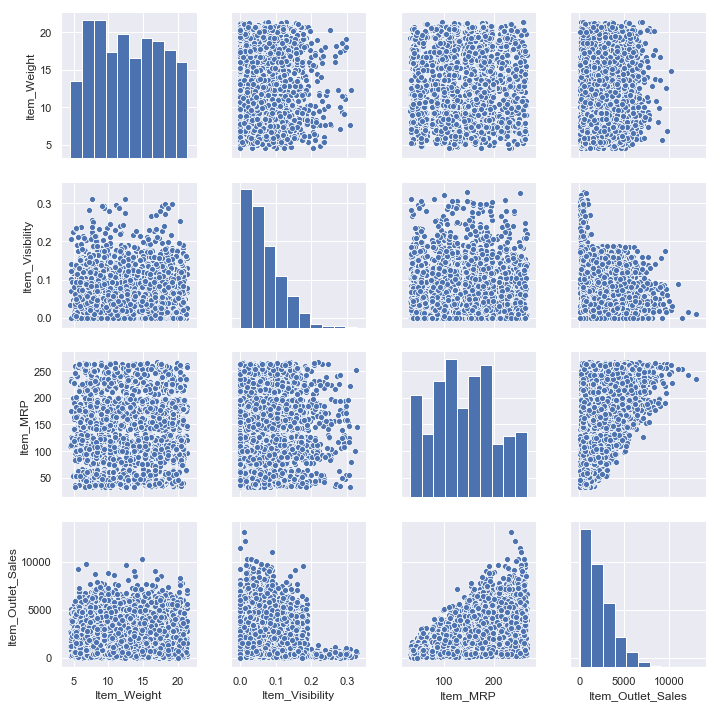

In [208]:
#scatterplot
sns.set()
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

#### Categorical Variables (vs) Item_Outlet_Sales

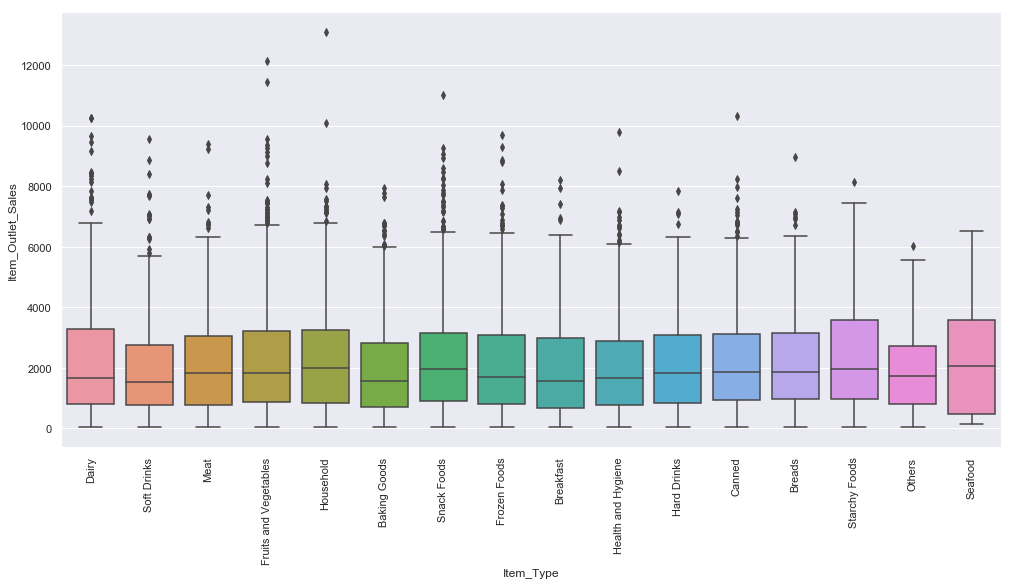

In [209]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data = df_train)

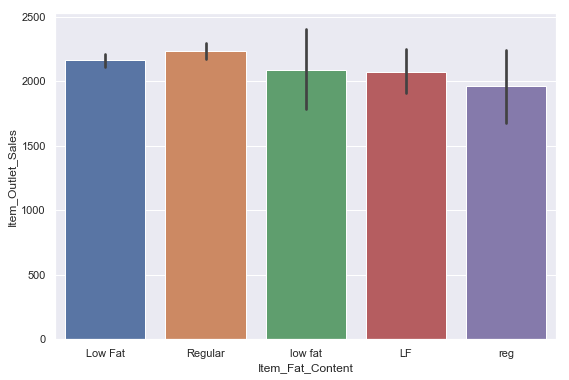

In [210]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data = df_train)

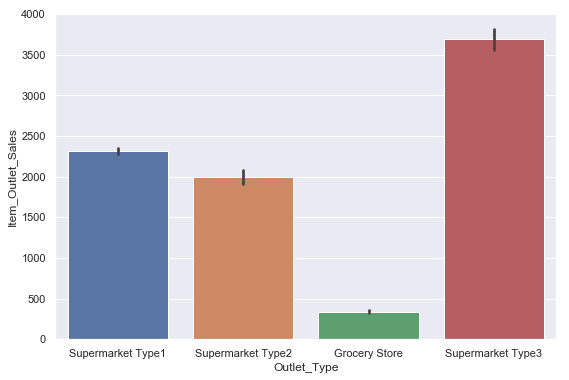

In [211]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data = df_train)

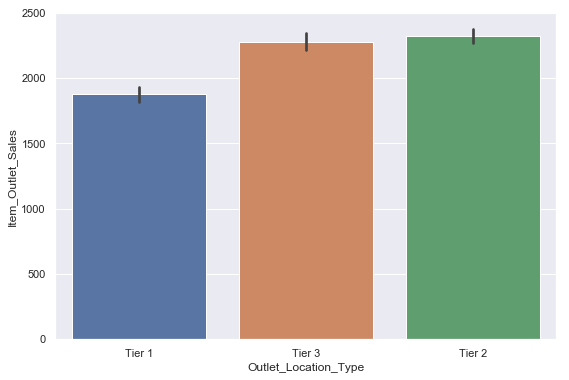

In [212]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data = df_train)

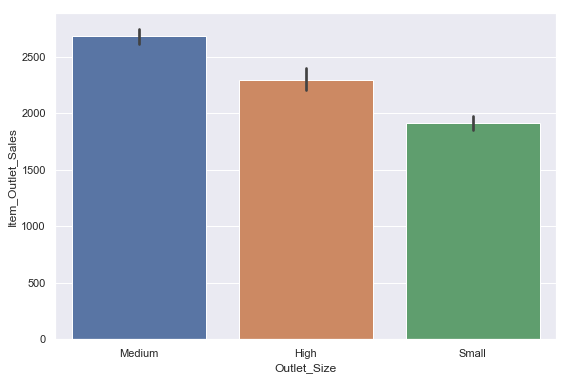

In [213]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data = df_train)

#### Ordinal Varibles Vs Target Varible

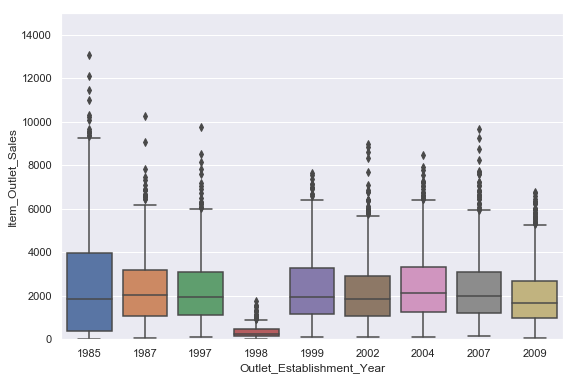

In [214]:
var = 'Outlet_Establishment_Year'
data = pd.concat([df_train['Item_Outlet_Sales'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data)
fig.axis(ymin=0, ymax=15000);  

#### Data Cleaning

In [215]:
df_train['Outlet_Years_Passed'] = 2019 - df_train['Outlet_Establishment_Year']

#### Item_Fat_content

In [216]:
Fat_Content = { 'low fat' : 'Low Fat', 
                  'LF' : 'Low Fat', 
                  'reg' : 'Regular'}

In [217]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map(Fat_Content)

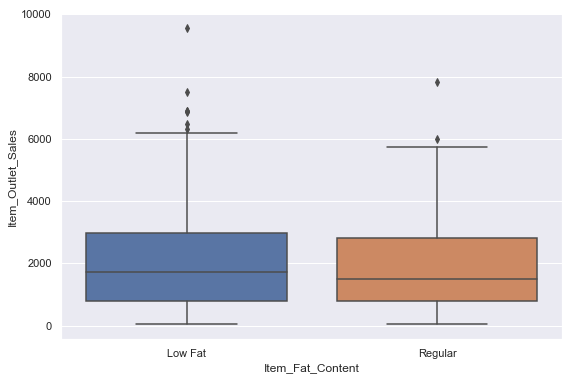

In [218]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data = df_train)

In [219]:
stats.ttest_ind(df_train['Item_Outlet_Sales'][df_train['Item_Fat_Content'] == 'Low Fat'], df_train['Item_Outlet_Sales'][df_train['Item_Fat_Content'] == 'Regular'])

Ttest_indResult(statistic=0.6975439066807714, pvalue=0.4857610294984669)

In [220]:
contingency_table = pd.crosstab(df_train['Item_Fat_Content'],df_train['Item_Type'],df_train['Item_Outlet_Sales'].values, aggfunc="sum",margins = True)

In [221]:
contingency_table

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
Low Fat,44180.4906,20907.4516,1635.2048,52598.8658,66665.2224,64686.4648,109665.9154,29132.7448,74379.847,165971.9556,29652.0688,29025.551,7028.1848,98585.6718,71137.4010,23816.3318,8.890694e+05
Regular,14163.5634,2908.2144,3832.3448,22027.3272,18630.4156,40035.2198,52751.3340,NaN,NaN,NaN,17892.0434,NaN,NaN,40870.1330,1225.7378,15240.1620,2.295765e+05
All,58344.0540,23815.6660,5467.5496,74626.1930,85295.6380,104721.6846,162417.2494,29132.7448,74379.847,165971.9556,47544.1122,29025.551,7028.1848,139455.8048,72363.1388,39056.4938,1.118646e+06


In [222]:
f_obs = np.array([contingency_table.iloc[0][0:15].values,
                  contingency_table.iloc[1][0:15].values])

In [223]:
from scipy import stats

stats.chi2_contingency(f_obs)[0:3]

(nan, nan, 14)

We can conclude Item_Fat _Content will not be useful for our prediction

#### Missing Values

In [224]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

#### Encoding

In [225]:
X_cat = df_train.select_dtypes(include=['object'])

In [226]:
X_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [227]:
X_cat = X_cat.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

In [228]:
df_train = df_train.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

In [229]:
X_enc = X_cat.copy()

#### Label Encoder

In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
X_enc = X_enc.apply(LabelEncoder().fit_transform)

In [232]:
df_train = df_train.drop(X_cat.columns, axis=1)

In [233]:
FinalData = pd.concat([df_train,X_enc], axis=1)

In [234]:
FinalData.sample(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years_Passed,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
8457,5.80,0.130931,89.9172,2004,1516.6924,15,4,6,2,1,1
1242,4.92,0.046026,196.5084,1999,3769.7596,20,0,9,1,0,1
215,6.67,0.150555,130.0626,1998,131.1626,21,13,0,1,2,0
4293,9.10,0.080418,48.8718,1999,425.4462,20,9,9,1,0,1
6699,NaN,0.032517,188.8214,1985,753.6856,34,3,4,2,0,0


In [235]:
FinalData = FinalData.drop(['Item_Weight','Outlet_Establishment_Year'],axis=1)

### Modelling

In [236]:
x = FinalData.drop(['Item_Outlet_Sales'],axis=1)

In [237]:
y = FinalData['Item_Outlet_Sales']

In [238]:
y = np.sqrt(FinalData['Item_Outlet_Sales'] )

In [239]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [240]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [241]:
y_pred = dtr.predict(x_test)

In [242]:
y_pred = y_pred*y_pred

In [243]:
y_test = y_test*y_test

In [244]:
y_test.max()

13086.964800000002

In [245]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

In [246]:
print(rmse)

1531.82197728436


In [247]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.61841551],
       [0.61841551, 1.        ]])

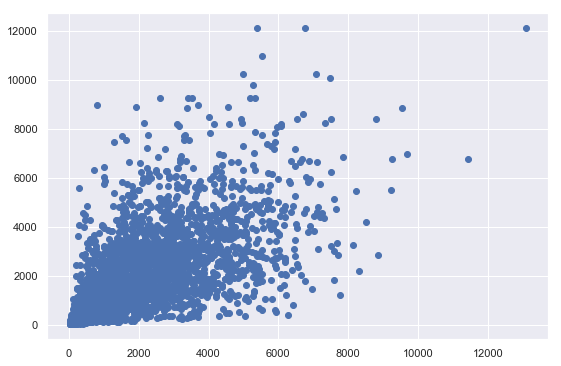

In [248]:
plt.scatter(y_test, y_pred)

#### Test Data

In [249]:
df_test = pd.read_csv(r'C:\Users\Aditi\Downloads\Test_u94Q5KV.txt')

In [250]:
df_test.shape

(5681, 11)

In [251]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3370,FDC50,15.85,Low Fat,0.136384,Canned,94.8094,OUT013,1987,High,Tier 3,Supermarket Type1
3751,FDJ28,12.30,Low Fat,0.021895,Frozen Foods,192.4162,OUT049,1999,Medium,Tier 1,Supermarket Type1
1733,NCF54,NaN,Low Fat,0.082951,Household,173.7422,OUT019,1985,Small,Tier 1,Grocery Store
1050,FDF45,18.20,Regular,0.012202,Fruits and Vegetables,57.3904,OUT035,2004,Small,Tier 2,Supermarket Type1
821,FDF39,14.85,Regular,0.019508,Dairy,262.0910,OUT035,2004,Small,Tier 2,Supermarket Type1


In [252]:
df_test['Outlet_Years_Passed'] = 2019 - df_test['Outlet_Establishment_Year']

In [253]:
df_test = df_test.drop(['Item_Identifier','Item_Fat_Content','Item_Weight','Outlet_Establishment_Year'],axis = 1)

#### Missing Values

In [254]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

#### Encoding

In [255]:
X_cat = df_test.select_dtypes(include=['object'])

In [256]:
X_cat.columns

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [257]:
X_enc = X_cat.copy()

#### Label Encoder

In [258]:
from sklearn.preprocessing import LabelEncoder

In [259]:
X_enc = X_enc.apply(LabelEncoder().fit_transform)

In [260]:
df_test = df_test.drop(X_cat.columns, axis=1)

In [261]:
FinalData = pd.concat([df_test,X_enc], axis=1)

In [262]:
FinalData.sample(5)

,Item_Visibility,Item_MRP,Outlet_Years_Passed,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4512,0.085792,228.9694,15,6,6,2,1,1
4693,0.065723,256.9646,17,5,7,1,1,1
4855,0.027280,151.2340,10,3,3,1,2,2
824,0.101730,246.2802,34,4,4,2,0,0
5446,0.043900,59.9904,22,15,8,2,0,1


In [264]:
y_pred = dtr.predict(FinalData)

In [266]:
pd.DataFrame(y_pred).to_csv('out.csv')